Члены команды: Лаптев Егор, Бабикян Арина, Юсуфов Ислам, Ельник Татьяна

# **Подготовка**

In [ ]:
%pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
import torch
import pandas as pd
from livelossplot import PlotLossesKeras
from torch import nn
from tensorflow import keras 
from keras import layers
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor, Compose
from torchvision.datasets.vision import VisionDataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout

In [ ]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
with open('/content/drive/MyDrive/data/data_train', 'rb') as f:
  train_data = pickle.load(f)
with open('/content/drive/MyDrive/data/data_test', 'rb') as f:
   test_data = pickle.load(f)
with open('/content/drive/MyDrive/data/meta', 'rb') as f:
  classes = pickle.load(f)

In [ ]:
train_images_full = train_data['images'] / 255
train_labels_full = train_data['labels']
test_images = test_data['images'] / 255

# **Общие пробы**

Изначально каждый член команды, чтобы разобраться с концепцией, начал пробовать обучать разные модели. Некоторые из них представлены ниже:

## №1

In [ ]:
model_best=tf.keras.models.Sequential()

model_best.add(Conv2D(32, 3,3, padding='same', input_shape=(32,32,3)))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(tf.keras.layers.Conv2D(32,3,3,padding = "same", activation = "relu"))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_best.add(Dropout(0.2))

model_best.add(tf.keras.layers.Conv2D(64,3,3,padding = 'same', activation ='relu'))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(tf.keras.layers.Conv2D(64,3,3,padding = "same", activation = "relu"))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_best.add(Dropout(0.3))


model_best.add(tf.keras.layers.Conv2D(128,3,3,padding = 'same', activation ='relu'))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(tf.keras.layers.Conv2D(128,3,3,padding = "same", activation = "relu"))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_best.add(Dropout(0.4))

model_best.add(tf.keras.layers.Conv2D(256,3,3,padding = 'same', activation ='relu'))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(tf.keras.layers.Conv2D(256,3,3,padding = "same", activation = "relu"))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_best.add(Dropout(0.5))

model_best.add(tf.keras.layers.Flatten())
model_best.add(tf.keras.layers.Dense(256,activation='relu'))
model_best.add(tf.keras.layers.Dropout(0.5))
model_best.add(tf.keras.layers.Dense(256,activation='relu'))

model_best.add(tf.keras.layers.Dropout(0.5))


model_best.add(tf.keras.layers.Dense(10))
model_best.add(tf.keras.layers.Activation('softmax'))

In [ ]:
model_best.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_best.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 11, 32)        896       
                                                                 
 activation (Activation)     (None, 11, 11, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 activation_1 (Activation)   (None, 4, 4, 32)          0         
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 32)         128       
 hNormalization)                                        

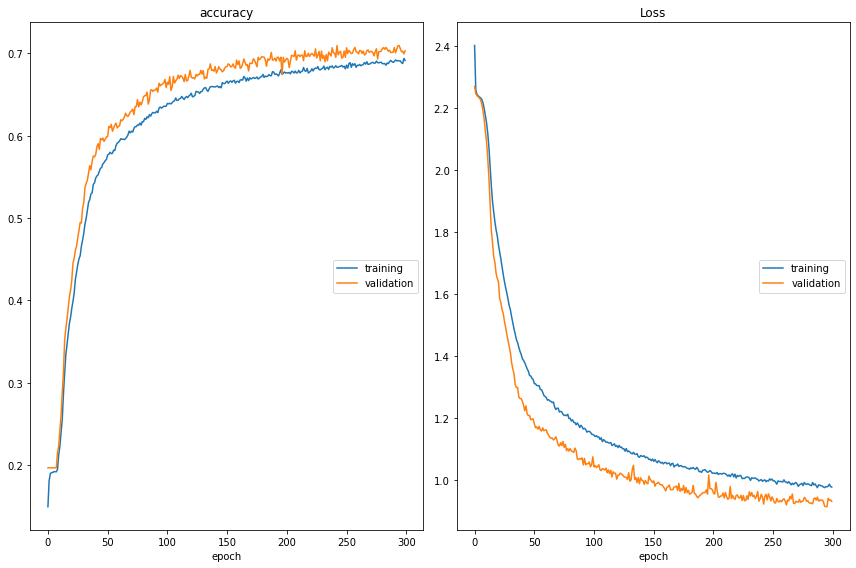

accuracy
	training         	 (min:    0.150, max:    0.694, cur:    0.691)
	validation       	 (min:    0.197, max:    0.710, cur:    0.703)
Loss
	training         	 (min:    0.976, max:    2.402, cur:    0.978)
	validation       	 (min:    0.915, max:    2.269, cur:    0.932)


In [ ]:
model_fit = model_best.fit(train_dataset, validation_data=val_dataset, epochs=300, callbacks=[PlotLossesKeras()], verbose=False)

Эта модель не содержит skip-connection, выдает нормальную, но не достаточно высокую точность.

## №2

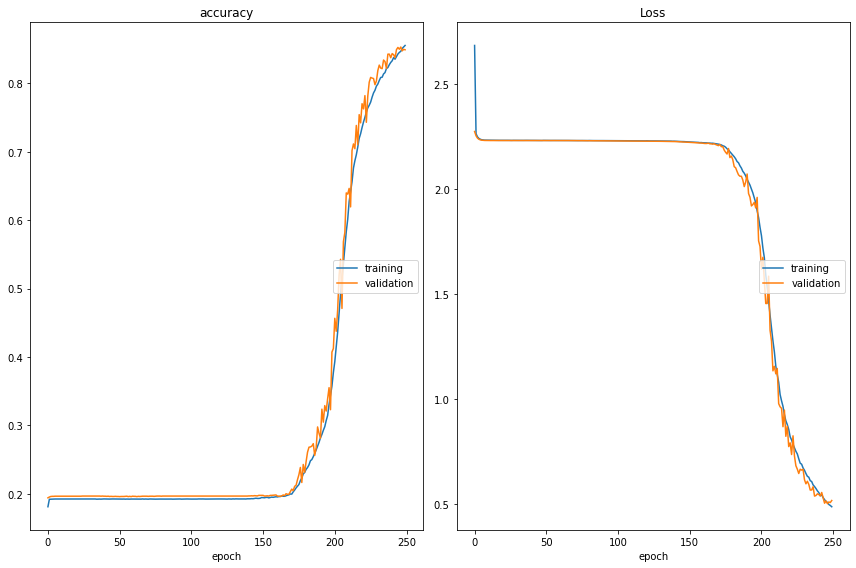

accuracy
	training         	 (min:    0.181, max:    0.855, cur:    0.855)
	validation       	 (min:    0.194, max:    0.853, cur:    0.849)
Loss
	training         	 (min:    0.488, max:    2.682, cur:    0.488)
	validation       	 (min:    0.502, max:    2.273, cur:    0.517)


In [ ]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1 = tf.keras.layers.MaxPooling2D(3)(x)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2 = tf.keras.layers.add([x, block_1])
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3 = tf.keras.layers.add([x, block_2])
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_3)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
Model_8 = tf.keras.Model(inputs, outputs)

Model_8.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])


nn_model_history_8 = Model_8.fit(train_dataset, validation_data=val_dataset, epochs=250, callbacks=[PlotLossesKeras()], verbose=False)
 

модель уже дает неплохой accuracy, но можно сделать и лучше, пробуем другую оптимизацию 

## №3

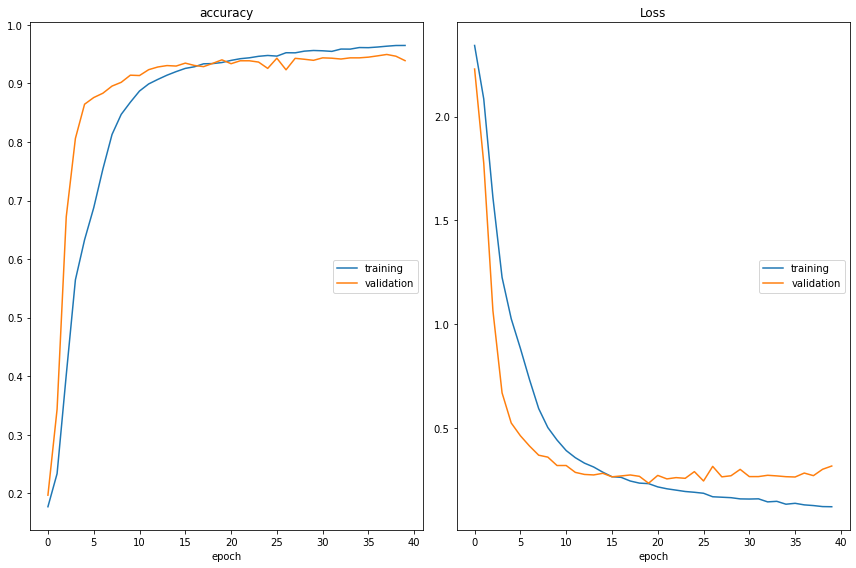

accuracy
	training         	 (min:    0.177, max:    0.965, cur:    0.965)
	validation       	 (min:    0.197, max:    0.949, cur:    0.939)
Loss
	training         	 (min:    0.120, max:    2.342, cur:    0.120)
	validation       	 (min:    0.233, max:    2.229, cur:    0.316)


In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu", padding='same')(inputs)
x = BatchNormalization()(x)
x = layers.Conv2D(32, 3, activation="relu", padding='same')(x)
x = layers.Conv2D(64, 3, activation="relu", padding='same')(x)
block_1 = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(block_1)

x = layers.Conv2D(64, 3, activation="relu", padding='same')(x)
x = BatchNormalization()(x)
x = layers.Conv2D(64, 3, activation="relu", padding='same')(x)
x = layers.add([x, block_1])
x = layers.Conv2D(128, 3, activation="relu", padding='same')(x)
block_2 = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(block_2)

x = layers.Conv2D(128, 3, activation="relu", padding='same')(x)
x = BatchNormalization()(x)
x = layers.Conv2D(128, 3, activation="relu", padding='same')(x)
x = layers.add([x, block_2])
block_3 = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(block_3)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(10,  activation='softmax')(x)

model = keras.Model(inputs, outputs)


optimizer = keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary = model.fit(train_dataset, validation_data=val_dataset, epochs=40, callbacks=[PlotLossesKeras()], verbose=False)

Можно заметить, эта модель дает лучшие результаты на тренировочной и валидационной выборках, поэтому она выбрана как окончательная.

# **Аугментация**

Мы пробовали применить различные аугментации:
1. Черно-белый датасет. Не помогло, так как на разных картинках изначально хуже или лучше видна информация, а без цветового различия она просто ухудшает точность и работу моделей. 
2. Смена контраста. Так же не помогло.
3. Контур. Поняли, что точный контур не получится сделать, и будет появляться шум в виде выделяющихся пикселей.
4. Угол поворота. Попытались разнообразить большим диапазоном, но это не помогло, поэтому окончательное значение - 8. 
5. Разнообразили такие характеристики, как зум, изменение масштаба, сдвиг высоты, интенсивность сдвига, и сам сдвиг каналов. Мы сделали так, что данные не расширяются, а изменяются во время обучения, что делает работу более быстрой.

In [ ]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.91, 1.09],
                             height_shift_range=0.10,
                             shear_range=0.16)

# **Конечная модель**

## Обработка данных

In [ ]:
for w in range(len(train_images_full)):
    img = train_images_full[w]
    img_blur = cv2.medianBlur(img, 3)
    train_images_full[w] = img_blur
for w in range(len(train_images_full)):
    img = train_images_full[w]
    img_blur = cv2.medianBlur(img, 3)
    train_images_full[w] = img_blur


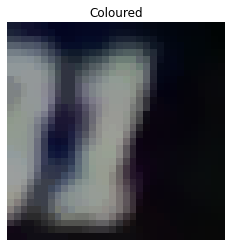

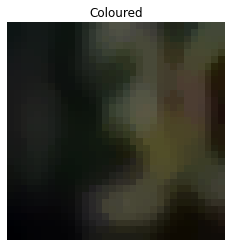

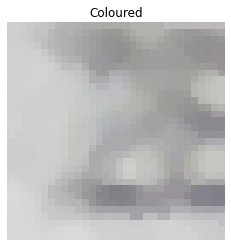

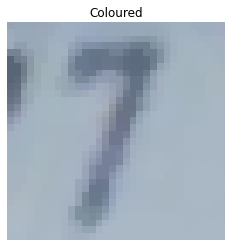

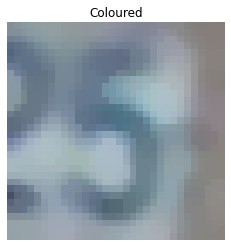

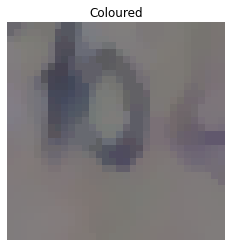

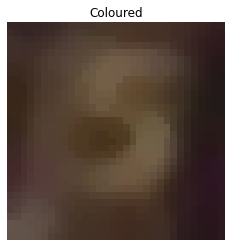

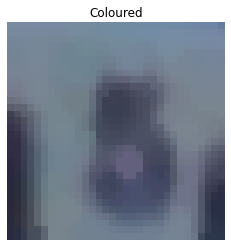

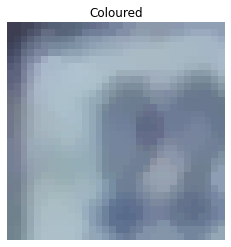

In [ ]:
k = 1
for img in train_images_full:
    plt.figure()
    plt.imshow(img,cmap='gray'),plt.title("Coloured"),plt.axis("off")
    if k == 9:
      break
    k += 1

In [ ]:
for w in range(len(test_images)):
    img = test_images[w]
    img_blur = cv2.medianBlur(img, 3)
    test_images[w] = img_blur
for w in range(len(test_images)):
    img = test_images[w]
    img_blur = cv2.medianBlur(img, 3)
    test_images[w] = img_blur

In [ ]:
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images_full, train_labels_full, test_size=0.01, random_state=0)

In [ ]:
batch_size = 256

val_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

In [ ]:
val_dataset = val_dataset.batch(batch_size)

In [ ]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.91, 1.09],
                             height_shift_range=0.10,
                             shear_range=0.16)

## Модель

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu", padding='same')(inputs)
x = BatchNormalization()(x)
x = layers.Conv2D(32, 3, activation="relu", padding='same')(x)
x = layers.Conv2D(64, 3, activation="relu", padding='same')(x)
block_1 = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(block_1)

x = layers.Conv2D(64, 3, activation="relu", padding='same')(x)
x = BatchNormalization()(x)
x = layers.Conv2D(64, 3, activation="relu", padding='same')(x)
x = layers.add([x, block_1])
x = layers.Conv2D(128, 3, activation="relu", padding='same')(x)
block_2 = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(block_2)

x = layers.Conv2D(128, 3, activation="relu", padding='same')(x)
x = BatchNormalization()(x)
x = layers.Conv2D(128, 3, activation="relu", padding='same')(x)
x = layers.add([x, block_2])
block_3 = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(block_3)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(10,  activation='softmax')(x)

model = keras.Model(inputs, outputs)


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_76 (Conv2D)             (None, 32, 32, 32)   896         ['input_14[0][0]']               
                                                                                                  
 batch_normalization_32 (BatchN  (None, 32, 32, 32)  128         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_77 (Conv2D)             (None, 32, 32, 32)   9248        ['batch_normalization_32[0]

In [ ]:
model_f = model.fit(datagen.flow(train_images, train_labels, batch_size=128), validation_data=val_dataset, epochs=8, callbacks=[tf.keras.callbacks.ModelCheckpoint('bb.h5', monitor='val_accuracy', save_best_only=True)], verbose=2)

Epoch 1/25
387/387 - 35s - loss: 2.2835 - accuracy: 0.1903 - val_loss: 2.2014 - val_accuracy: 0.2080 - 35s/epoch - 90ms/step
Epoch 2/25
387/387 - 27s - loss: 2.0417 - accuracy: 0.2563 - val_loss: 1.7645 - val_accuracy: 0.3240 - 27s/epoch - 69ms/step
Epoch 3/25
387/387 - 28s - loss: 1.8446 - accuracy: 0.3010 - val_loss: 1.4186 - val_accuracy: 0.5320 - 28s/epoch - 73ms/step
Epoch 4/25
387/387 - 29s - loss: 1.6630 - accuracy: 0.3933 - val_loss: 1.2006 - val_accuracy: 0.5860 - 29s/epoch - 74ms/step
Epoch 5/25
387/387 - 27s - loss: 1.3281 - accuracy: 0.5230 - val_loss: 0.9640 - val_accuracy: 0.7000 - 27s/epoch - 70ms/step
Epoch 6/25
387/387 - 27s - loss: 1.0578 - accuracy: 0.6364 - val_loss: 0.6102 - val_accuracy: 0.8160 - 27s/epoch - 69ms/step
Epoch 7/25
387/387 - 26s - loss: 0.7919 - accuracy: 0.7451 - val_loss: 0.4044 - val_accuracy: 0.8760 - 26s/epoch - 68ms/step
Epoch 8/25
387/387 - 26s - loss: 0.5694 - accuracy: 0.8311 - val_loss: 0.3397 - val_accuracy: 0.9100 - 26s/epoch - 68ms/step


In [ ]:
train_acc = model_f.history['accuracy']
val_acc = model_f.history['val_accuracy']

train_loss = model_f.history['loss']
val_loss = model_f.history['val_loss']

Text(0.5, 1.0, 'Epochs vs. Training and Validation Loss')

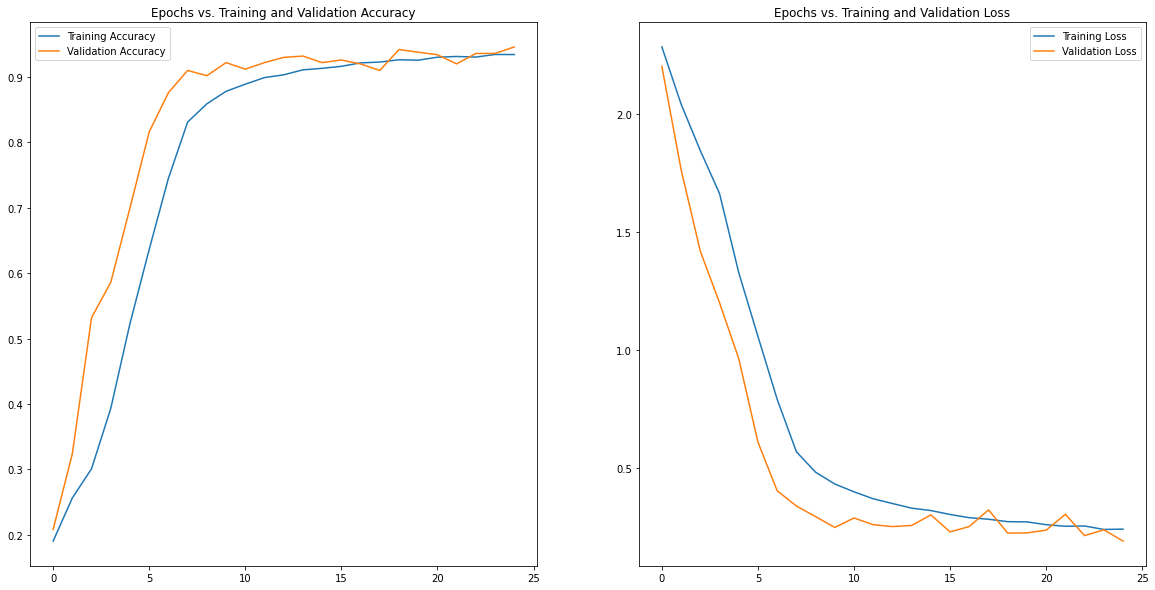

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

In [ ]:
model_f = model.fit(datagen.flow(train_images, train_labels, batch_size=128), validation_data=val_dataset, epochs=5, callbacks=[tf.keras.callbacks.ModelCheckpoint('bb.h5', monitor='val_accuracy', save_best_only=True)], verbose=2)

Epoch 1/5
387/387 - 30s - loss: 0.2365 - accuracy: 0.9363 - val_loss: 0.2012 - val_accuracy: 0.9520 - 30s/epoch - 77ms/step
Epoch 2/5
387/387 - 26s - loss: 0.2372 - accuracy: 0.9364 - val_loss: 0.1977 - val_accuracy: 0.9440 - 26s/epoch - 67ms/step
Epoch 3/5
387/387 - 26s - loss: 0.2248 - accuracy: 0.9395 - val_loss: 0.2337 - val_accuracy: 0.9320 - 26s/epoch - 68ms/step
Epoch 4/5
387/387 - 26s - loss: 0.2215 - accuracy: 0.9400 - val_loss: 0.2361 - val_accuracy: 0.9380 - 26s/epoch - 68ms/step
Epoch 5/5
387/387 - 29s - loss: 0.2171 - accuracy: 0.9425 - val_loss: 0.2376 - val_accuracy: 0.9440 - 29s/epoch - 76ms/step


In [ ]:
model_f = model.fit(datagen.flow(train_images, train_labels, batch_size=128), validation_data=val_dataset, epochs=5, callbacks=[tf.keras.callbacks.ModelCheckpoint('bb.h5', monitor='val_accuracy', save_best_only=True)], verbose=2)

Epoch 1/5
387/387 - 28s - loss: 0.2128 - accuracy: 0.9435 - val_loss: 0.2258 - val_accuracy: 0.9400 - 28s/epoch - 72ms/step
Epoch 2/5
387/387 - 26s - loss: 0.2117 - accuracy: 0.9429 - val_loss: 0.2362 - val_accuracy: 0.9380 - 26s/epoch - 68ms/step
Epoch 3/5
387/387 - 28s - loss: 0.2069 - accuracy: 0.9430 - val_loss: 0.2026 - val_accuracy: 0.9460 - 28s/epoch - 71ms/step
Epoch 4/5
387/387 - 26s - loss: 0.2076 - accuracy: 0.9429 - val_loss: 0.2184 - val_accuracy: 0.9440 - 26s/epoch - 68ms/step
Epoch 5/5
387/387 - 26s - loss: 0.1998 - accuracy: 0.9455 - val_loss: 0.2183 - val_accuracy: 0.9340 - 26s/epoch - 68ms/step


In [ ]:
model_f = model.fit(datagen.flow(train_images, train_labels, batch_size=128), validation_data=val_dataset, epochs=5, callbacks=[tf.keras.callbacks.ModelCheckpoint('bb.h5', monitor='val_accuracy', save_best_only=True)], verbose=2)

Epoch 1/5
387/387 - 27s - loss: 0.1999 - accuracy: 0.9460 - val_loss: 0.2130 - val_accuracy: 0.9320 - 27s/epoch - 70ms/step
Epoch 2/5
387/387 - 35s - loss: 0.1988 - accuracy: 0.9460 - val_loss: 0.2227 - val_accuracy: 0.9400 - 35s/epoch - 90ms/step
Epoch 3/5
387/387 - 27s - loss: 0.1877 - accuracy: 0.9474 - val_loss: 0.2141 - val_accuracy: 0.9320 - 27s/epoch - 71ms/step
Epoch 4/5
387/387 - 26s - loss: 0.1920 - accuracy: 0.9475 - val_loss: 0.3132 - val_accuracy: 0.9180 - 26s/epoch - 68ms/step
Epoch 5/5
387/387 - 26s - loss: 0.1861 - accuracy: 0.9495 - val_loss: 0.2161 - val_accuracy: 0.9480 - 26s/epoch - 68ms/step


In [ ]:
bm = tf.keras.models.load_model('bb1.h5')

In [ ]:
preds = bm.predict(test_images)

782/782 [==============================] - 2s 3ms/step


In [ ]:
df = pd.DataFrame(data={'Id':[i for i in range(25000)], 'Category': np.argmax(preds, axis=1)})
df.to_csv('sub.csv', index=False)

итак, данная модель дала accuracy 0.944. В дальнейшем были идеи новых архитектур, которые были, к сожалению, не выдали больший результат